# CHURN PREDICTION

THIS NOTEBOOK ANALYSES THE TELECOM DATASET AND ANSWERS SOME OF THE QUESTIONS.

In [1]:
#IMPORTING NECCESARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#READING THE CSV FILE
df = pd.read_csv("Churn.csv")

#### ANALYSING THE DATA.

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### CONVERTING ALL OBJECT DATATYPES TO NUMERIC

In [6]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')

In [7]:
from sklearn.preprocessing import LabelEncoder

def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [8]:
df = df.apply(lambda x: object_to_int(x))

In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [10]:
df.dtypes

customerID            int32
gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

#### DATA VISUALISATION

In [11]:
df.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

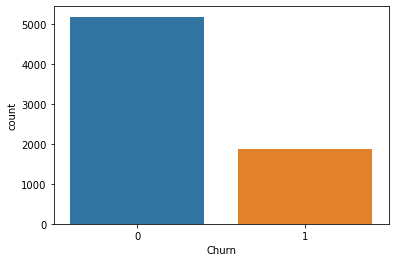

In [12]:
sns.countplot(x='Churn', data=df)

In [13]:
print('No churn', round(df['Churn'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('churn', round(df['Churn'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No churn 73.46 % of the dataset
churn 26.54 % of the dataset


C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


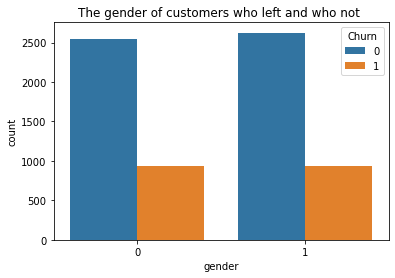

In [14]:
sns.countplot(df.gender, hue = df.Churn)
plt.title('The gender of customers who left and who not ')
plt.show()

In [15]:
df.gender.value_counts()

1    3555
0    3488
Name: gender, dtype: int64

In [16]:
female_left = df.query('gender =="Female" and Churn == "Yes"')

In [17]:
male_left = df.query('gender =="Male" and Churn == "Yes"')

In [18]:
female_left.shape

(0, 21)

In [19]:
male_left.shape

(0, 21)

In [20]:
print('The percentage of female who left is {}%'.format((939/1869)*100))

print('The percentage of male who left is {}%'.format((930/1869)*100))

The percentage of female who left is 50.24077046548957%
The percentage of male who left is 49.75922953451043%


In [21]:
df.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


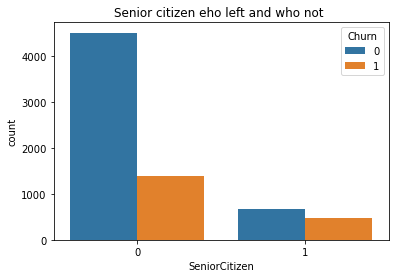

In [22]:
sns.countplot(df.SeniorCitizen, hue = df.Churn)
plt.title('Senior citizen eho left and who not ')
plt.show()

In [23]:
senior_left = df.query('SeniorCitizen == 1 and Churn == "Yes"')

senior_left.shape

(0, 21)

In [24]:
print('The percentage of senior citizen who left is {}%'.format((476/1142)*100))

The percentage of senior citizen who left is 41.68126094570928%


In [25]:
df.Partner.value_counts()

0    3641
1    3402
Name: Partner, dtype: int64

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


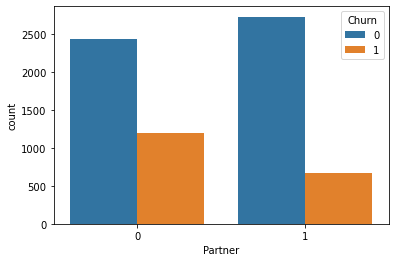

In [26]:
sns.countplot(df.Partner,hue = df.Churn)
plt.show()

In [27]:
df.query("Partner == 'Yes' and Churn == 'Yes'").shape

(0, 21)

In [28]:
df.query("Partner == 'No' and Churn == 'Yes'").shape

(0, 21)

In [29]:
print('There are {}% of customers who have partner, left the company '.format((669/3402)*100))
print("There are {}% of customers who didn't have partner left ".format((1200/3641)*100))


There are 19.66490299823633% of customers who have partner, left the company 
There are 32.95797857731392% of customers who didn't have partner left 


In [30]:
df.Dependents.value_counts()

0    4933
1    2110
Name: Dependents, dtype: int64

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


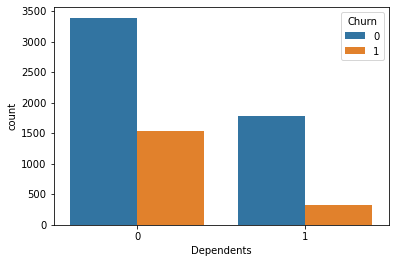

In [31]:
sns.countplot(df.Dependents,hue = df.Churn)
plt.show()

In [32]:
df.query("Dependents == 'Yes' and Churn == 'Yes'").shape

(0, 21)

In [33]:
df.query("Dependents == 'No' and Churn == 'Yes'").shape

(0, 21)

In [34]:
print("There are {}% of customers who are Dependents left the company \n and there are {}% of customers who are independents left"
     .format((326/2110)*100,(1543/4933)*100))

There are 15.450236966824646% of customers who are Dependents left the company 
 and there are 31.279140482465028% of customers who are independents left


<AxesSubplot:xlabel='Churn', ylabel='count'>

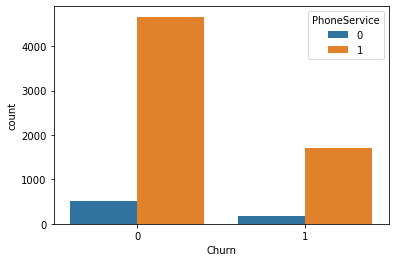

In [35]:
sns.countplot(data=df,x='Churn',hue='PhoneService')

<AxesSubplot:xlabel='Churn', ylabel='count'>

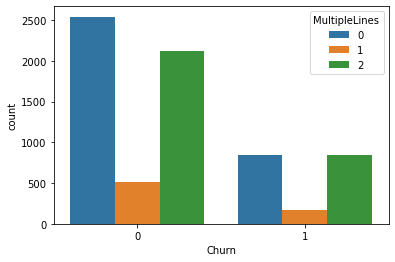

In [36]:
sns.countplot(data=df,x='Churn',hue='MultipleLines')

<AxesSubplot:xlabel='Churn', ylabel='count'>

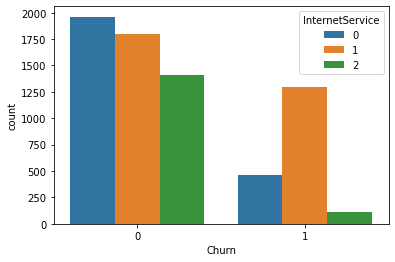

In [37]:
sns.countplot(data=df,x='Churn',hue='InternetService')

<AxesSubplot:xlabel='Churn', ylabel='count'>

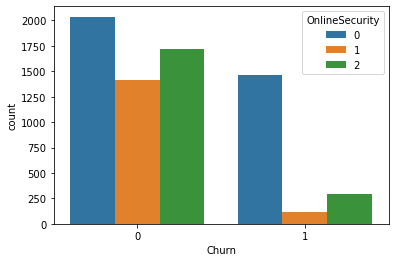

In [38]:
sns.countplot(data=df,x='Churn',hue='OnlineSecurity')

<AxesSubplot:xlabel='Churn', ylabel='count'>

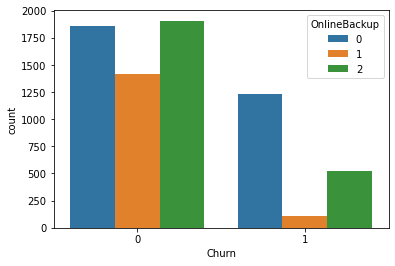

In [39]:
sns.countplot(data=df,x='Churn',hue='OnlineBackup')

<AxesSubplot:xlabel='Churn', ylabel='count'>

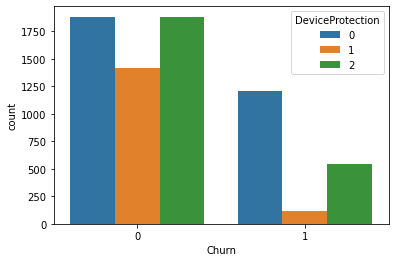

In [40]:
sns.countplot(data=df,x='Churn',hue='DeviceProtection')

<AxesSubplot:xlabel='Churn', ylabel='count'>

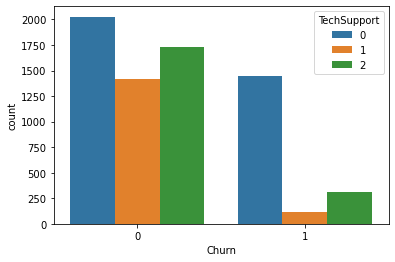

In [41]:
sns.countplot(data=df,x='Churn',hue='TechSupport')

<AxesSubplot:xlabel='Churn', ylabel='count'>

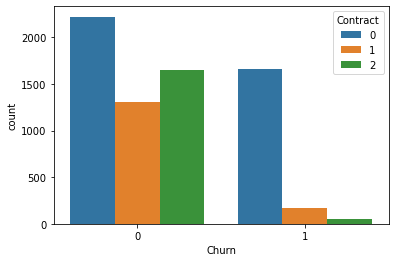

In [42]:
sns.countplot(data=df,x='Churn',hue='Contract')

<AxesSubplot:xlabel='Churn', ylabel='count'>

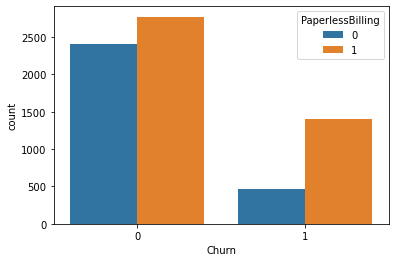

In [43]:
sns.countplot(data=df,x='Churn',hue='PaperlessBilling')

<AxesSubplot:xlabel='Churn', ylabel='count'>

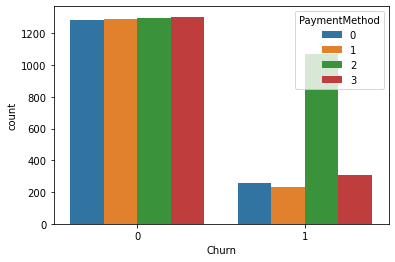

In [44]:
sns.countplot(data=df,x='Churn',hue='PaymentMethod')

#### CHECKING AND HANDLING MISSING DATA.

In [45]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [46]:
df['TotalCharges']= df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [47]:
df['TotalCharges'].isnull().any()

False

#### CHECKING CORRELATION

<AxesSubplot:>

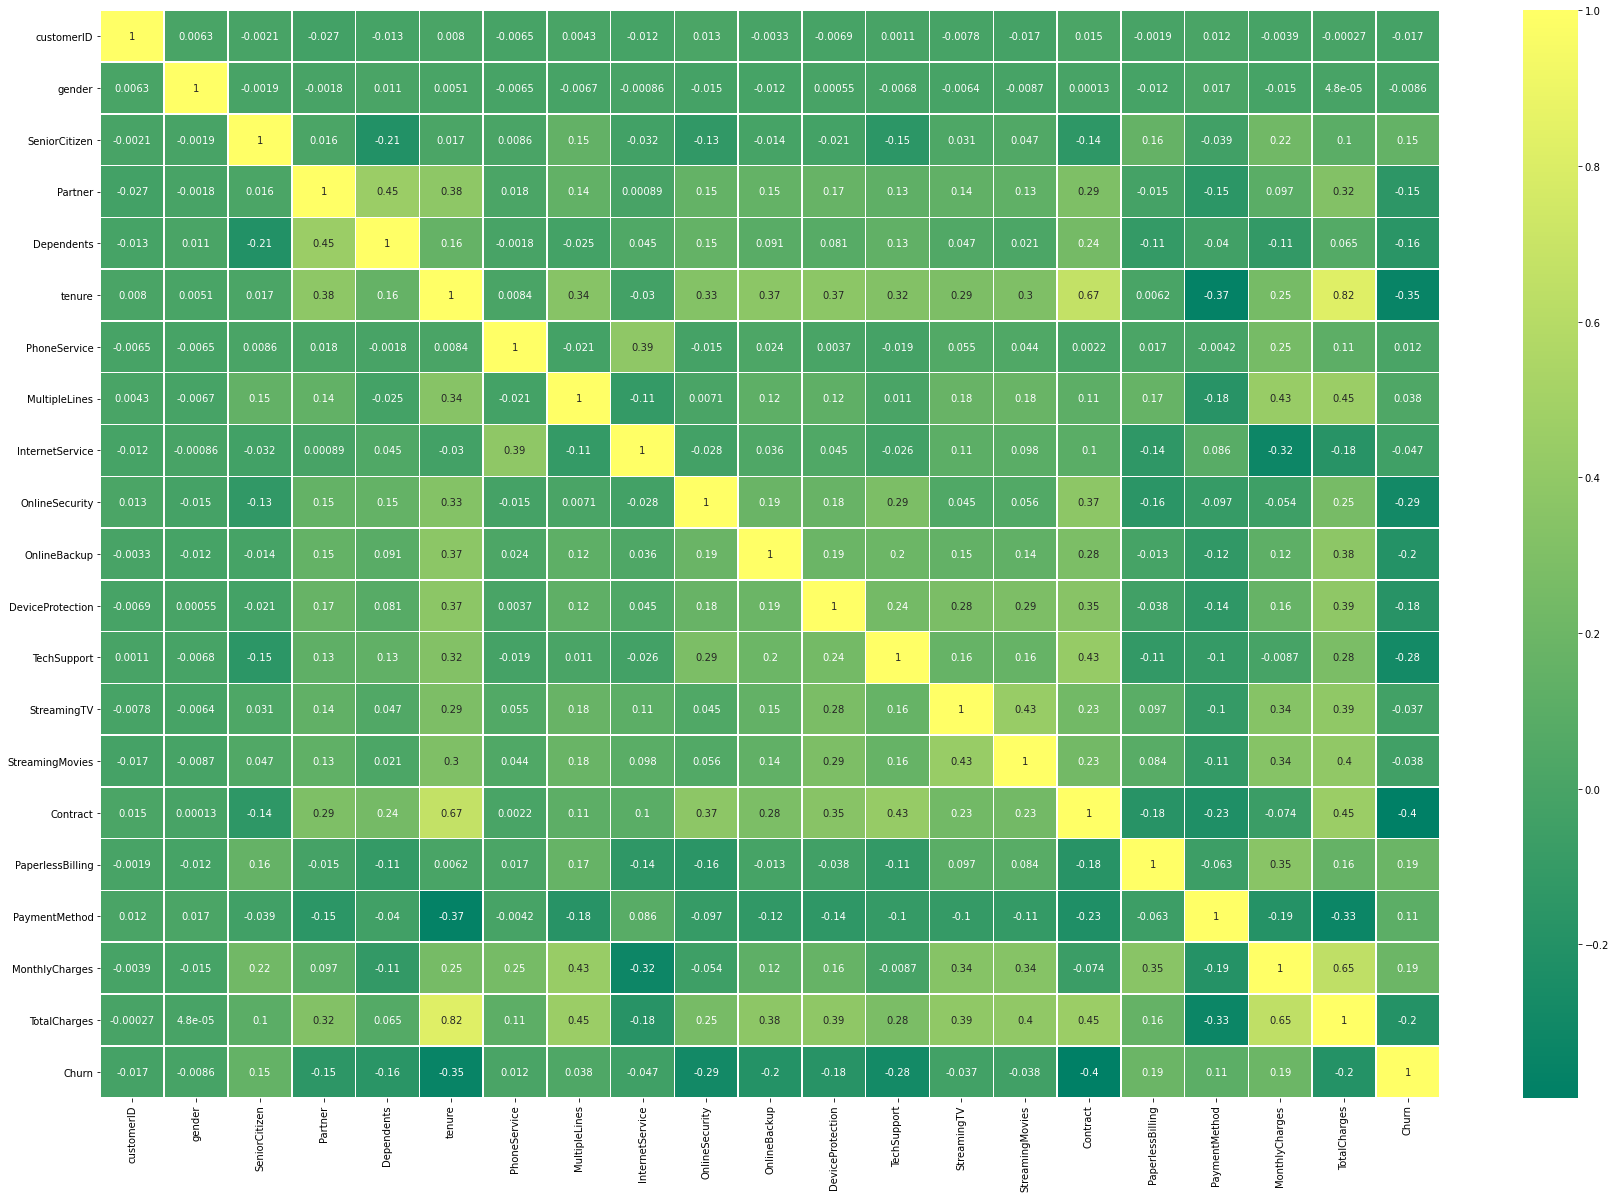

In [48]:
ax = df.corr()
plt.figure(figsize=(30,20)) 
sns.heatmap(ax, annot=True, linewidth=0.5, cmap="summer")

#### DROPPING UNWANTED COLUMNS

In [49]:
df=df.drop(['gender','StreamingTV','StreamingMovies','customerID'],axis=1)

#### CHECKING FOR OUTLIERS

<AxesSubplot:>

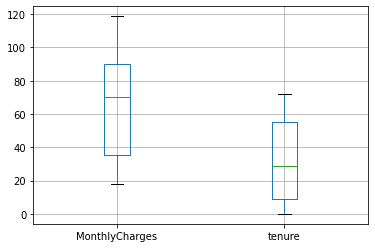

In [50]:
df.boxplot(column=['MonthlyCharges','tenure'])

<AxesSubplot:>

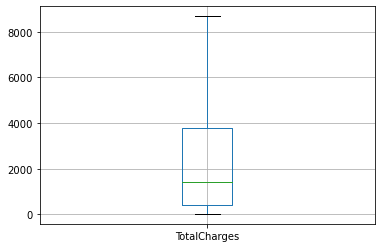

In [51]:
df.boxplot(column='TotalCharges')

###### NO OUTLIERS WERE FOUND.

#### HANDLING IMBALANCE DATA.

In [52]:
#from imblearn.combine import SMOTETomek

# Implementing Oversampling for Handling Imbalanced 
#smk = SMOTETomek(random_state=42)
#X_train,y_train=smk.fit_resample(X_train,y_train)

In [53]:
#churners_number = len(df[df['Churn'] == 1])
#print("Number of churners", churners_number)

#churners = (df[df['Churn'] == 1])

#non_churners = df[df['Churn'] == 0].sample(n=churners_number)
#print("Number of non-churners", len(non_churners))
#df2 = churners.append(non_churners)

#### SPLITTING THE DATA AND SCALING IT.

In [54]:
from sklearn.model_selection import train_test_split
X=df.drop(['Churn'],axis=1)
y=df['Churn']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape,y_train.shape, X_test.shape, y_test.shape

((4930, 16), (4930,), (2113, 16), (2113,))

In [56]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

X_train=sc.fit_transform(X_train)

In [57]:
X_test=sc.transform(X_test)

#### VARIOUS MACHINE LEARNING MODELS

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

classifiers = [['DecisionTree :',DecisionTreeClassifier()],
               ['RandomForest :',RandomForestClassifier()], 
               ['Naive Bayes :', GaussianNB()],
               ['KNeighbours :', KNeighborsClassifier()],
               ['SVM :', SVC()],
               ['LogisticRegression :', LogisticRegression()]]

predictions_df = pd.DataFrame()
predictions_df['actual_labels'] = y_test

for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    predictions_df[name.strip(" :")] = predictions
    print(name,accuracy_score(y_test, predictions))
    print(classification_report(y_test,predictions))

DecisionTree : 0.7340274491244676
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1539
           1       0.51      0.49      0.50       574

    accuracy                           0.73      2113
   macro avg       0.66      0.66      0.66      2113
weighted avg       0.73      0.73      0.73      2113

RandomForest : 0.7917652626597255
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1539
           1       0.66      0.48      0.55       574

    accuracy                           0.79      2113
   macro avg       0.74      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113

Naive Bayes : 0.7595835305253195
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1539
           1       0.54      0.76      0.63       574

    accuracy                           0.76      2113
   macro avg       0.72    

#### SELECTING MODEL WITH BEST ACCURACY.

In [59]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.81
